## Question 2

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the combined dataset

In [2]:
datacomb=pd.read_csv("../Coursework/datacomb.csv")

In [3]:
#Removing the unnecessary unnamed column
datacomb = datacomb.iloc[: , 1:]

## Importing the plane_data csv

In [4]:
planedata=pd.read_csv("../Coursework/planedata_c.csv")

In [5]:
planedata

,Unnamed: 0,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
1,35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
2,36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
3,37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
4,38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
...,...,...,...,...,...,...,...,...,...,...
4475,5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
4476,5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
4477,5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
4478,5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


The column 'year' is assumed to be the manufacture year of planes

In [6]:
#removing the unnamed column in plane_data
planedata= planedata.iloc[: , 1:]

## Renaming tailnum in plane_data dataset to make it common to both the datasets

In [7]:
planedata=planedata.rename(columns={'tailnum':'TailNum'})

## Merging the combined dataset with the plane_data keeping TailNum as the primary key

In [8]:
finalcomb = datacomb.merge(planedata,on=['TailNum'])

In [9]:
finalcomb.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999


In [10]:
#Checking the number of rows and columns of 'finalcomb'
finalcomb.shape

(12030549, 37)

Missing values from ArrDelay and DepDelay are removed since we need those columns in this question

In [11]:
#Removing missing values from ArrDelay column
finalcomb= finalcomb[pd.notnull(finalcomb['ArrDelay'])]

In [14]:
#Removing missing values from DepDelay column
finalcomb= finalcomb[pd.notnull(finalcomb['DepDelay'])]

In [15]:
#grouping finalcomb by the maunfacture year on Averages of ArrDelay and DepDelay
avgdelays=finalcomb.groupby('year')['ArrDelay','DepDelay'].mean().reset_index()

<ipython-input-15-045d303b2a98>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgdelays=finalcomb.groupby('year')['ArrDelay','DepDelay'].mean().reset_index()


In [17]:
#Renaming the columns of avgdelays appropriately
avgdelays=avgdelays.rename(columns={'ArrDelay':'AvgArrDelay','DepDelay':'AvgDepDelay'})

Removing the out of range data "0000" and "None" from the 'year' column of avgdelays.

In [18]:
#index of the row where year=0000 in avgdelays is found
index = avgdelays[avgdelays['year'] == '0000'].index

In [19]:
#The row which contains "0000" in the year column is removed
avgdelays.drop(index,inplace=True)

In [20]:
#index of the row where year="None" in avgdelays is found
index1=avgdelays[avgdelays['year'] == 'None'].index

In [21]:
#The row which contains "None" in the year column is removed
avgdelays.drop(index1,inplace=True)

In [23]:
#finding average of both the average delays to find a common value for delays
avgofdelays= (avgdelays.AvgArrDelay + avgdelays.AvgDepDelay)/2

## Plotting a lineplot 

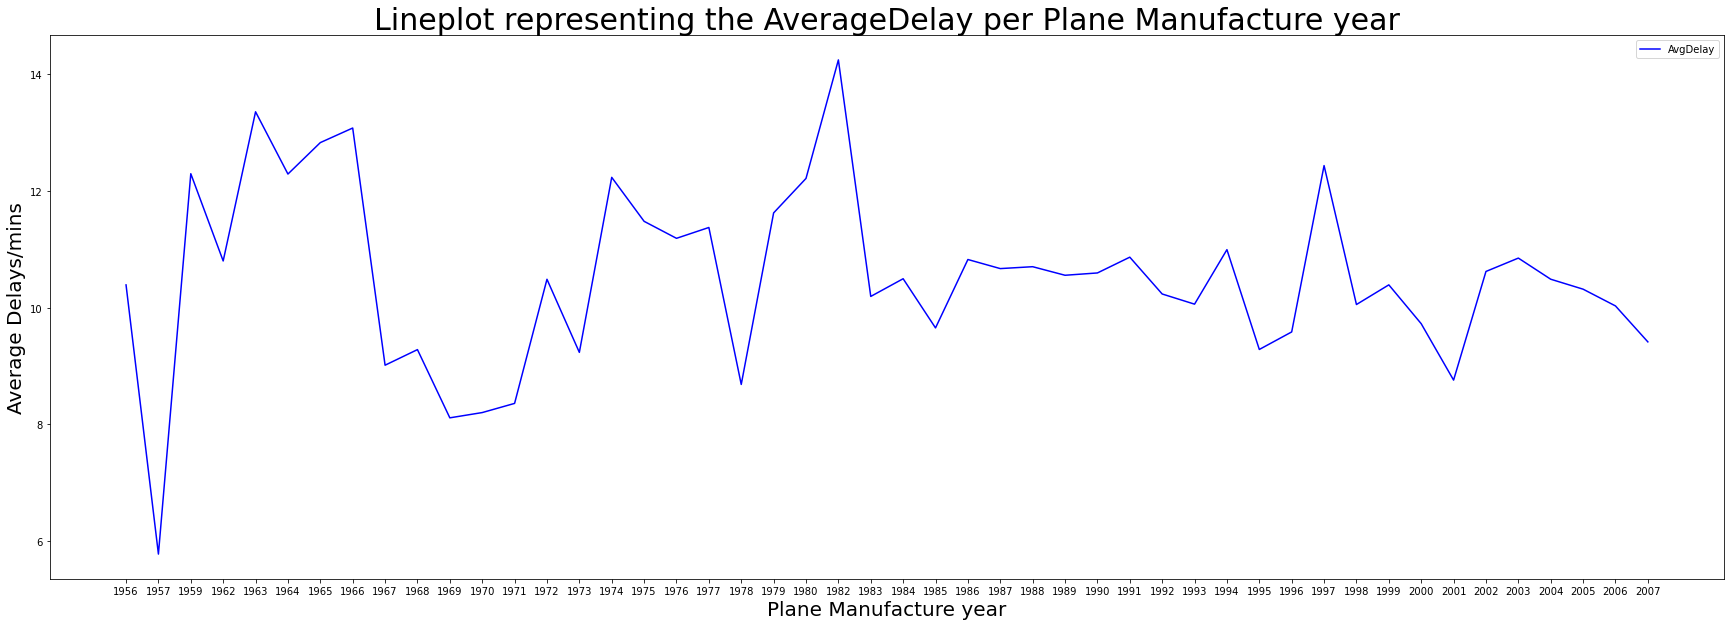

In [28]:
fig, ax=plt.subplots(figsize=(30,10))
ax.plot(avgdelays['year'],avgofdelays,color='blue',label='AvgDelay')
plt.xticks(avgdelays['year'])
ax.set_ylabel('Average Delays/mins',size=20)
ax.set_xlabel('Plane Manufacture year',size=20)
plt.title("Lineplot representing the AverageDelay per Plane Manufacture year",size=30)
ax.legend()

In [30]:
#Changing years to integer datatype to calculate the correlation
avgdelays.year=avgdelays.year.astype(int)

Finding the pearson correlation between Avgofdelays and plane manufacture year

In [31]:
np.corrcoef(avgdelays.year,avgofdelays)

array([[ 1.        , -0.07109128],
       [-0.07109128,  1.        ]])